In [1]:
# import libraries
import pandas as pd
import scipy.stats as st
import math as m
import statsmodels.stats.api as sm

In [2]:
# import data
df = pd.read_csv('Wine-quality-challenge.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

# Normal Distribution

<Axes: ylabel='Density'>

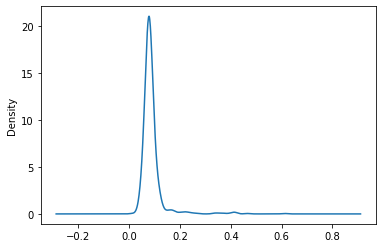

In [5]:
# Density plot of Chloride
df['chlorides'].plot.density()

In [6]:
# check the number of observations within X standard deviations
n = 1
for i in range(1,4):
    print(i, df.loc[(df['chlorides'] <= df['chlorides'].mean() + i * df['chlorides'].std()) &
      (df['chlorides'] >= df['chlorides'].mean() - i * df['chlorides'].std())]['chlorides'].count()/df['chlorides'].count())

1 0.9480925578486554
2 0.9718574108818011
3 0.9806128830519074


<Axes: ylabel='Density'>

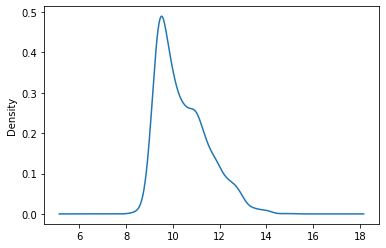

In [7]:
#plot alcohol distribution
df['alcohol'].plot.density()

In [8]:
for i in range(1,4):
    count = df.loc[(df['alcohol'] <= df['alcohol'].mean() + i * df['alcohol'].std()) & (df['alcohol'] >= df['alcohol'].mean() - i * df['alcohol'].std())]['alcohol'].count()
    print(i, count/df['alcohol'].count())

1 0.7035647279549718
2 0.9562226391494684
3 0.9949968730456535


# Shapiro-Wilks test

In [9]:
# Shapiro-Wilks test for normality
stat,p = st.shapiro(df['chlorides'])
print(p)
if p > 0.05:
    print("Sample looks Gaussian/Normal (fail to reject H0)")
else:
    print("Sample does not look Gaussian/Normal (reject H0)")

0.0
Sample does not look Gaussian/Normal (reject H0)


In [10]:
# Shapiro-Wilks test for Sulphates
stat, p = st.shapiro(df['sulphates'])
print(p)
if p > 0.05:
    print("Sample looks Gaussian/Normal (fail to reject H0)")
else:
    print("Sample does not look Gaussian/Normal (reject H0)")

5.822191090213209e-38
Sample does not look Gaussian/Normal (reject H0)


# Standard Error (of the sample mean)

In [11]:
#Using a function (alcohol)
st.sem(df['alcohol'])

0.026650018979018173

In [12]:
#Manually std/sqrt(n)
df['alcohol'].std() / m.sqrt(df['alcohol'].count())

0.026650018979018173

In [13]:
# Standard error of pH
st.sem(df['pH'])

0.0038608683325203784

# Confidence Interval

In [14]:
#Confidence interval of the mean of citric acid
print(df['citric acid'].mean())
st.norm.interval(confidence=0.95, loc=df['citric acid'].mean(),
                scale=st.sem(df['citric acid']))

0.2709756097560976


(0.2614275451830121, 0.28052367432918307)

array([[<Axes: title={'center': 'citric acid'}>]], dtype=object)

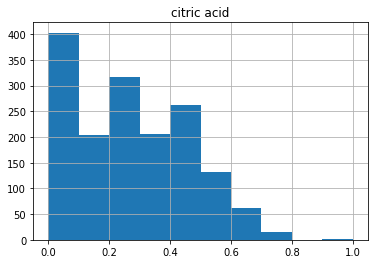

In [15]:
#Histogram
df[['citric acid']].hist()

In [16]:
#Confidence interval of the density mean
print(df['density'].mean())
st.norm.interval(confidence=0.95, loc=df['density'].mean(),
                scale=st.sem(df['density']))

0.9967466791744841


(0.9966541725972521, 0.9968391857517162)

array([[<Axes: title={'center': 'density'}>]], dtype=object)

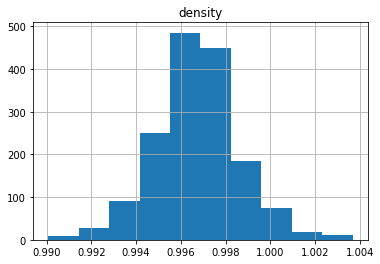

In [17]:
#Histogram of density
df[['density']].hist()

# T-test

In [18]:
df2 = pd.read_csv('stackoverflow.csv')
df2.head()

,Country,Salary,YearsCodedJob,OpenSource,Hobby,CompanySizeNumber,Remote,CareerSatisfaction,Data_scientist,Database_administrator,...,Developer_with_stats_math_background,DevOps,Embedded_developer,Graphic_designer,Graphics_programming,Machine_learning_specialist,Mobile_developer,Quality_assurance_engineer,Systems_administrator,Web_developer
0,United Kingdom,100000.000000,20,0,1,5000,Remote,8,0,0,...,0,0,1,0,0,0,0,0,0,0
1,United States,130000.000000,20,1,1,1000,Remote,9,0,0,...,0,1,1,0,0,0,0,1,0,1
2,United States,175000.000000,16,0,1,10000,Not remote,7,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Germany,64516.129030,4,0,0,1000,Not remote,9,0,0,...,0,0,0,0,0,0,0,0,0,1
4,India,6636.323594,1,0,1,5000,Not remote,5,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
# t test of salaries of United Kingdom and Germany
salries_uk = df2.loc[df2['Country'] == 'United Kingdom']['Salary']
salries_de = df2.loc[df2['Country'] == 'Germany']['Salary']

In [27]:
stat, p = st.ttest_ind(a=salries_uk, b=salries_de)
print(p)
if p > 0.05:
    print('There is no difference in salaries between UK and Germany')
else:
    print('Salaries of UK and Germany are different.')

0.026389999555203505
Salaries of UK and Germany are different.


In [29]:
# t test of yearscodedjob of US and India
experience_us = df2.loc[df2['Country'] == 'United States']['YearsCodedJob']
experience_in = df2.loc[df2['Country'] == 'India']['YearsCodedJob']
stat, p = st.ttest_ind(a=experience_us, b=experience_in)
print(p)
if p > 0.05:
    print('There is no difference in experience between US and India')
else:
    print('Experience of US and India are different.')

5.225676347614714e-58
Experience of US and India are different.


<Axes: >

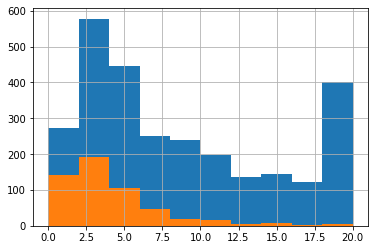

In [36]:
experience_us.hist()
experience_in.hist()

# Chi-square test

In [37]:
# cross tabulation
tab = pd.crosstab(index=df2['Country'], columns=df2['Remote'])

In [38]:
tab

Remote,Not remote,Remote
Country,,
Canada,457,28
Germany,717,40
India,482,56
United Kingdom,953,70
United States,2410,381


In [43]:
chi2, p, dof, exp  = st.chi2_contingency(tab)
print(p)

3.321120877301216e-16


In [45]:
if p > 0.05:
    print('There is no relationship (fail to reject H0)')
else:
    print('There is strong relationship (reject H0)')

There is strong relationship (reject H0)


In [48]:
# cross tabulation
tab = pd.crosstab(index=df2['Hobby'], columns=df2['CompanySizeNumber'])
tab

CompanySizeNumber,1,10,20,100,500,1000,5000,10000
Hobby,,,,,,,,
0,101,123,293,245,91,180,60,243
1,311,400,961,918,309,436,192,731


In [49]:
chi2, p, dof, exp  = st.chi2_contingency(tab)
print(p)
if p > 0.05:
    print('There is no relationship (fail to reject H0)')
else:
    print('There is strong relationship (reject H0)')

0.025708455559671013
There is strong relationship (reject H0)
